In [1]:
import pandas as pd
import os
import json
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def jsonRead(file_name):
    # Opening JSON file
    f = open(file_name)

    # returns JSON object as a dictionary
    data = json.load(f)
    return data

In [4]:
# seconds
time = 300
# 0 -> 'CP', 1 -> 'SAT'
strategy = 1

ins_test_idxs = range(1,41)
ins_test_idxs

csv_folder = os.path.join("csv_test")
plots_folder = os.path.join(csv_folder, "plots")
if not os.path.exists(csv_folder):
    os.makedirs(plots_folder)

In [12]:
def get_df(model='base', solver='Chuffed'):
    # path for out folder
    out_folder = os.path.join("CP", "out", solver.lower(), model)
    # structure of dataframe
    results = {
        "file":[],
        # "objective":[],
        # "solveTime":[],
        "totalTime":[],
        # "propagations":[],
        # "failures":[]
    }
    # iterate over all the test ins
    for i in ins_test_idxs:
        file_in = "ins-"+str(i)
        # execute the script
        if strategy == 0:
            !python3 CP.py --model $model --solver $solver --data $file_in --time $time
        elif strategy == 1:
            !python3 SAT.py --model $model --data $file_in --time $time
        else:
            print("please strategy in range(0, 4)")
        file_in += ".json"
        file_out_path = os.path.join(out_folder, file_in)
        if os.path.exists(file_out_path):
            file_out = jsonRead(file_out_path)
            results["file"].append(file_in)
            results["objective"].append(file_out["solution"]["makespan"])
            # results["solveTime"].append(file_out["stats"]["solveTime"])
            results["totalTime"].append(file_out["stats"]["TOTAL_TIME"])
            # results["propagations"].append(file_out["stats"]["propagations"])
            # results["failures"].append(file_out["stats"]["failures"])
        else:
            results["file"].append(file_in)
            results["objective"].append(0)
            results["solveTime"].append(0)
            #results["optTime"].append(0)
            results["propagations"].append(0)
            results["failures"].append(0)
    # clear the cell output
    clear_output(wait=True)
    return pd.DataFrame(data=results)

In [15]:
def compare(df1, df2, ft, idf1, idf2):
    idf1 += ' '
    idf2 += ' '
    df = pd.concat([df1, df2], axis=1)
    df.columns = [*[idf1+f for f in df1.columns], *[idf2+f for f in df2.columns]]
    df.index = [ins[:-5] for ins in df[idf1+'file']]
    ax = df[[idf1+ft, idf2+ft]].plot.bar()
    ax.set_yscale("log")
    ax.set_xlabel("data ins")
    ax.set_ylabel(ft)
    ax.legend([idf1, idf2])
    ax.grid(True, axis='y')
    ax.set_title(ft, fontweight="bold")
    ax.set_facecolor("white")
    plt.savefig(os.path.join(plots_folder,
                             idf1 + "_" + idf2 + "_" + ft + ".png"))

## base model Gecode vs Chuffed

In [16]:
model  = 'base'
solver = 'Chuffed'
df_base_cf = get_df(model=model, solver=solver)
df_base_cf.to_csv(os.path.join(csv_folder,
                               "df_"+model+"_"+solver+'.csv'), 
                  index=False)
print("complete!")

ValueError: All arrays must be of the same length

In [7]:
model  = 'base'
solver = 'Gecode'
df_base_gc = get_df(model=model, solver=solver)
df_base_gc.to_csv(os.path.join(csv_folder,
                               "df_"+model+"_"+solver+'.csv'), 
                  index=False)
print("complete!")

complete!


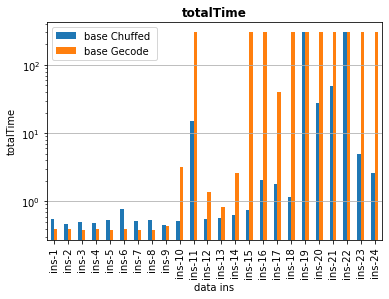

In [8]:
compare(df_base_cf, df_base_gc, 'totalTime', 'base Chuffed', 'base Gecode')

## Chuffed solver base vs symmetry

In [9]:
model  = 'symmetry'
solver = 'Chuffed'
df_sym_cf = get_df(model=model, solver=solver)
df_sym_cf.to_csv(os.path.join(csv_folder,
                             "df_"+model+"_"+solver+'.csv'), 
                 index=False)
print("complete!")

complete!


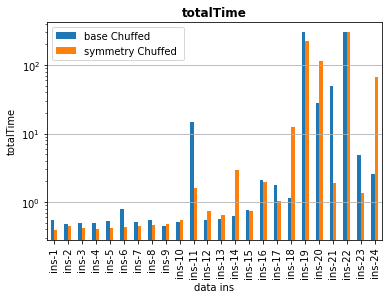

In [10]:
compare(df_base_cf, df_sym_cf, 'totalTime', 'base Chuffed', 'symmetry Chuffed')

## Chuffed solver base vs rotation

In [11]:
model  = 'rotation'
solver = 'Chuffed'
df_rot_cf = get_df(model=model, solver=solver)
df_rot_cf.to_csv(os.path.join(csv_folder,
                             "df_"+model+"_"+solver+'.csv'), 
                 index=False)
print("complete!")

complete!


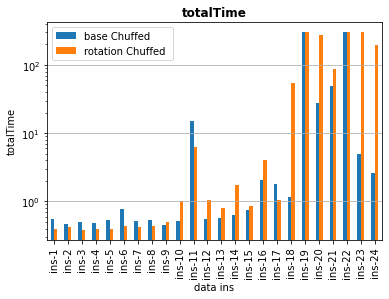

In [12]:
compare(df_base_cf, df_rot_cf, 'totalTime', 'base Chuffed', 'rotation Chuffed')

## Chuffed solver base vs search

In [13]:
model  = 'search'
solver = 'Chuffed'
df_search_cf = get_df(model=model, solver=solver)
df_search_cf.to_csv(os.path.join(csv_folder,
                                 "df_"+model+"_"+solver+'.csv'), 
                 index=False)
print("complete!")

complete!


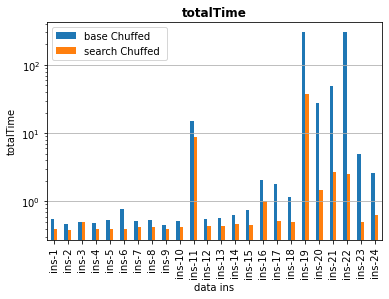

In [14]:
compare(df_base_cf, df_search_cf, 'totalTime', 'base Chuffed', 'search Chuffed')